In [42]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [58]:
def corp_tax(profits,deductible):
    if profits>deductible:
        taxable_gain=profits-deductible
        if taxable_gain<=50000:
            total_tax = taxable_gain*0.19
        elif 50000<taxable_gain<=250000:
            effective_rate=0.25-(250000-taxable_gain)*3/(200*taxable_gain)
            total_tax = taxable_gain*effective_rate
        elif taxable_gain>250000:
            total_tax = taxable_gain*0.25
    elif profits<=deductible:
        total_tax = 0
    return total_tax

def capga_tax(profits):
    if profits<3000:
        total_tax=0
    elif profits>=3000:
        taxable_gain=profits-3000
        if taxable_gain<=50270:
            total_tax = taxable_gain*0.1
        elif taxable_gain>50270:
            total_tax = 50270*0.1 + (taxable_gain-50270)*0.2
    return total_tax

In [59]:
def plot_comparison(profits_min,profits_max,granularity,business_deductible):
    profits = np.linspace(profits_min,profits_max,granularity)
    corporation_tax = [corp_tax(profits[k],business_deductible) for k in range(len(profits))]
    capital_gains_tax = [capga_tax(profits[k]) for k in range(len(profits))]
    
    fig, ax = plt.subplots()
    corptax, =ax.plot(profits,corporation_tax,label='Business')
    captax, =ax.plot(profits,capital_gains_tax,label='Personal')
    ax.legend(handles=[corptax,captax],loc = 'best')
    ax.set_ylabel(r'Total Tax Liability')
    ax.set_xlabel(r'Trading Profits')

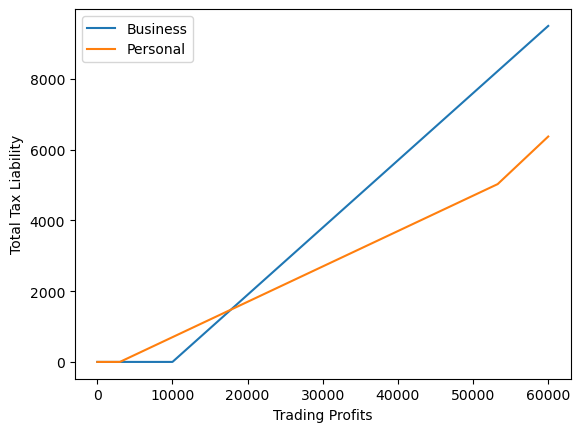

In [63]:
plot_comparison(0,60000,1000,10000)